In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

In [4]:
data=pd.read_csv("high_diamond_ranked_10min.csv")

In [5]:
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [6]:
data.shape

(9879, 40)

In [7]:
data.drop('gameId',axis=1,inplace=True)

In [8]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


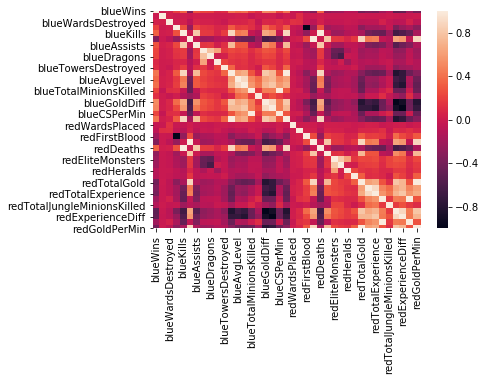

In [11]:
sns.heatmap(data.corr())

In [13]:
data=data.sample(frac=1).reset_index(drop=True)

In [14]:
y=data['blueWins']

In [15]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9874    1
9875    0
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

In [16]:
X=data.drop('blueWins',axis=1,inplace=False)

In [17]:
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,25,1,0,4,5,3,1,1,0,0,...,0,16269,7.0,17872,247,42,478,-346,24.7,1626.9
1,15,2,1,5,4,4,0,0,0,0,...,0,15563,6.8,16714,222,38,-71,359,22.2,1556.3
2,82,2,1,12,3,14,1,1,0,0,...,0,15067,6.4,15510,182,52,-3965,-3505,18.2,1506.7
3,14,2,0,9,6,13,1,1,0,0,...,0,16058,6.8,17940,232,37,-1177,691,23.2,1605.8
4,23,1,1,6,10,7,2,1,1,0,...,0,18647,7.2,19235,239,55,1127,-471,23.9,1864.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,14,1,1,7,9,5,1,0,1,1,...,0,17967,6.8,16803,196,57,1237,-753,19.6,1796.7
9875,10,2,0,1,6,0,1,0,1,0,...,0,16219,6.8,17534,204,43,2160,88,20.4,1621.9
9876,12,2,1,4,9,2,0,0,0,0,...,0,17666,7.4,19033,208,60,1876,2154,20.8,1766.6
9877,20,1,0,6,2,7,1,1,0,0,...,0,15030,6.8,17428,211,57,-919,36,21.1,1503.0


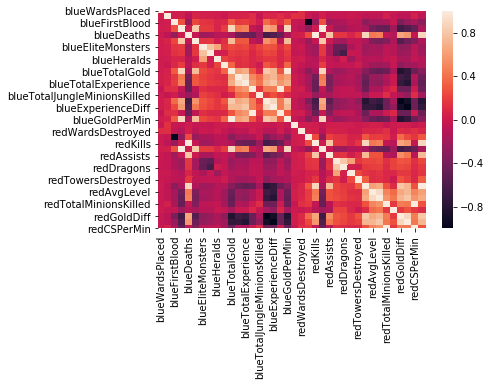

In [18]:
sns.heatmap(X.corr())

In [20]:
train_test_split=0.7
num_examples=X.shape[0]
num_train_examples=int(np.floor(num_examples*train_test_split))
num_test_examples=int(np.floor(num_examples-num_train_examples))

print(num_examples)
print(num_test_examples)
print(num_train_examples)

9879
2964
6915


In [21]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')


In [22]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x=tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [28]:
X_train=X.iloc[0:num_train_examples,:]
y_train=y.iloc[0:num_train_examples]

X_test=X.iloc[num_train_examples:num_examples,:]
y_test=y.iloc[num_train_examples:num_examples]

In [31]:
BATCH_SIZE=32
EPOCHS=300

In [38]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

Train on 5532 samples, validate on 1383 samples
Epoch 1/300
5532/5532 [==============================] - 0s 48us/sample - loss: 0.6932 - acc: 0.5034 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 2/300
5532/5532 [==============================] - 0s 50us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 3/300
5532/5532 [==============================] - 0s 51us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 4/300
5532/5532 [==============================] - 0s 49us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 5/300
5532/5532 [==============================] - 0s 49us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 6/300
5532/5532 [==============================] - 0s 48us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 7/300
5532/5532 [==============================] - 0s 48us/sample - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6929 - va

5532/5532 [==============================] - 0s 60us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 60/300
5532/5532 [==============================] - 0s 54us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 61/300
5532/5532 [==============================] - 0s 45us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 62/300
5532/5532 [==============================] - 0s 44us/sample - loss: 0.6931 - acc: 0.5009 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 63/300
5532/5532 [==============================] - 0s 42us/sample - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 64/300
5532/5532 [==============================] - 0s 41us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 65/300
5532/5532 [==============================] - 0s 41us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 66/300
5532/5532 [================

Epoch 118/300
5532/5532 [==============================] - 0s 57us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6931 - val_acc: 0.5105
Epoch 119/300
5532/5532 [==============================] - 0s 52us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 120/300
5532/5532 [==============================] - 0s 51us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 121/300
5532/5532 [==============================] - 0s 54us/sample - loss: 0.6932 - acc: 0.4958 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 122/300
5532/5532 [==============================] - 0s 50us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 123/300
5532/5532 [==============================] - 0s 54us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6931 - val_acc: 0.5105
Epoch 124/300
5532/5532 [==============================] - 0s 41us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 125/300
5532/5

5532/5532 [==============================] - 0s 64us/sample - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 177/300
5532/5532 [==============================] - 0s 56us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 178/300
5532/5532 [==============================] - 0s 56us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 179/300
5532/5532 [==============================] - 0s 50us/sample - loss: 0.6932 - acc: 0.4933 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 180/300
5532/5532 [==============================] - 0s 53us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 181/300
5532/5532 [==============================] - 0s 68us/sample - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6931 - val_acc: 0.5105
Epoch 182/300
5532/5532 [==============================] - 0s 81us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 183/300
5532/5532 [=========

5532/5532 [==============================] - 0s 58us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 235/300
5532/5532 [==============================] - 0s 59us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 236/300
5532/5532 [==============================] - 0s 57us/sample - loss: 0.6931 - acc: 0.4995 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 237/300
5532/5532 [==============================] - 0s 57us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 238/300
5532/5532 [==============================] - 0s 50us/sample - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6929 - val_acc: 0.5105
Epoch 239/300
5532/5532 [==============================] - 0s 48us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 240/300
5532/5532 [==============================] - 0s 66us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 241/300
5532/5532 [=========

5532/5532 [==============================] - 0s 58us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 293/300
5532/5532 [==============================] - 0s 59us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 294/300
5532/5532 [==============================] - 0s 51us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 295/300
5532/5532 [==============================] - 0s 44us/sample - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 296/300
5532/5532 [==============================] - 0s 43us/sample - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 297/300
5532/5532 [==============================] - 0s 43us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 298/300
5532/5532 [==============================] - 0s 44us/sample - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5105
Epoch 299/300
5532/5532 [=========

In [39]:
loss, accuracy=model.evaluate(X_test,y_test)

2964/2964 [==============================] - 0s 33us/sample - loss: 0.6932 - acc: 0.4879
